# Final report

In [1]:
% clean
clear all;

% Add directory
addpath('./codes');
addpath('./data');

% Load data
data = load('./data/img_restoration.mat');

In [2]:
% 参数设置
gaussian_sigma = [0.1, 0.05, 0.01];       % 高斯噪声标准差
gaussian_power = gaussian_sigma.^2;
motion_len = [10, 15, 20];          % 运动模糊长度
motion_theta = [0, 45, 90, 135];        % 运动模糊角度

% Original image 
I1 = data.I1;  
I2 = data.I2;
I1 = I1 / 255;          % 转换为 double 类型
I2 = I2 / 255;

% 添加加性高斯噪声
gaussian_I1 = cell(length(gaussian_sigma));
gaussian_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I1{i} = imnoise(I1, 'gaussian', 0, gaussian_power(i));
    [gaussian_I1_snr(i, 1), gaussian_I1_snr(i, 2)] = psnr(gaussian_I1{i}, I1);
end
gaussian_I2 = cell(length(gaussian_sigma));
gaussian_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_I2{i} = imnoise(I2, 'gaussian', 0, gaussian_power(i));
    [gaussian_I2_snr(i, 1), gaussian_I2_snr(i, 2)] = psnr(gaussian_I2{i}, I2);
end

% 创建运动模糊核
h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));
end
h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));
end

% 应用运动模糊 
motion_I1_len = cell(length(motion_len));
motion_I1_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I1_len_snr(i, 1), motion_I1_len_snr(i, 2)] = psnr(motion_I1_len{i}, I1);
end
motion_I1_theta = cell(length(motion_theta));
motion_I1_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I1_theta_snr(i, 1), motion_I1_theta_snr(i, 2)] = psnr(motion_I1_theta{i}, I1);
end

motion_I2_len = cell(length(motion_len));
motion_I2_len_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_len)
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    [motion_I2_len_snr(i, 1), motion_I2_len_snr(i, 2)] = psnr(motion_I2_len{i}, I2);
end
motion_I2_theta = cell(length(motion_theta));
motion_I2_theta_snr = zeros(length(motion_len), 2);
for i = 1:length(motion_theta)
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    [motion_I2_theta_snr(i, 1), motion_I2_theta_snr(i, 2)] = psnr(motion_I2_theta{i}, I2);
end

% 高斯加运动模糊图片
gaussian_motion_I1 = cell(length(gaussian_sigma));
gaussian_motion_I1_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I1{i} = imnoise(motion_I1_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I1_snr(i, 1), gaussian_motion_I1_snr(i, 2)] = psnr(gaussian_motion_I1{i}, I1);
end
gaussian_motion_I2 = cell(length(gaussian_sigma));
gaussian_motion_I2_snr = zeros(length(gaussian_sigma), 2);
for i = 1:length(gaussian_sigma)
    gaussian_motion_I2{i} = imnoise(motion_I2_len{1}, 'gaussian', 0, gaussian_power(i));
    [gaussian_motion_I2_snr(i, 1), gaussian_motion_I2_snr(i, 2)] = psnr(gaussian_motion_I2{i}, I2);
end

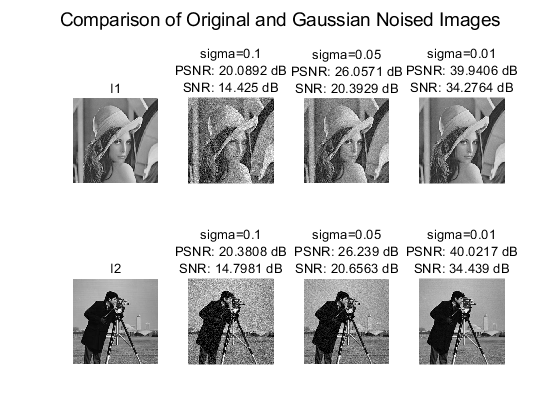

In [4]:
% 显示原图和加高斯噪声后的图像
figure;

% 调整字体大小
font_size = 10;

% I1 图像及其高斯噪声图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_I1{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_I1{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_I1{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% I2 图像及其高斯噪声图像
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_I2{1}), title({...
    'sigma=0.1', ...
    ['PSNR: ', num2str(gaussian_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_I2{2}), title({...
    'sigma=0.05', ...
    ['PSNR: ', num2str(gaussian_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_I2{3}), title({...
    'sigma=0.01', ...
    ['PSNR: ', num2str(gaussian_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Comparison of Original and Gaussian Noised Images', 'FontSize', 14);

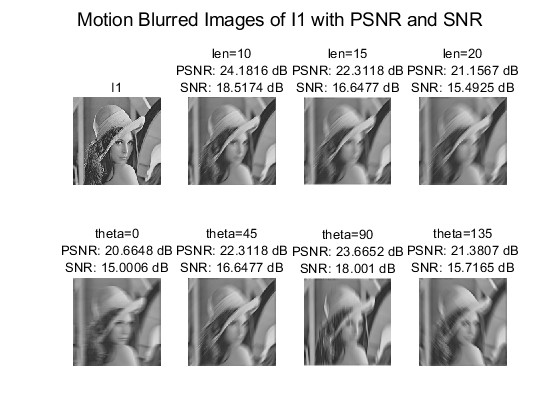

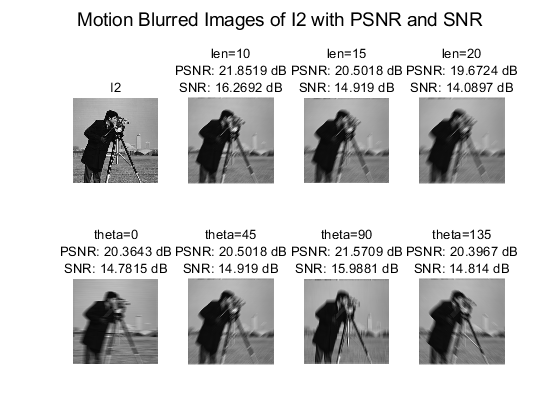

In [5]:


% 显示原图和加运动模糊的 I1 图像
figure;

% 调整字体大小
font_size = 10;

% 显示Original image 和运动模糊图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I1_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I1_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I1_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I1_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I1_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I1_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I1_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I1_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I1_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I1_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I1_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I1_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Motion Blurred Images of I1 with PSNR and SNR', 'FontSize', 14);

% 显示原图和加运动模糊的 I2 图像
figure;

% 调整字体大小
font_size = 10;

% 显示Original image 和运动模糊图像
subplot(2,4,1), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,2), imshow(motion_I2_len{1}), title({...
    'len=10', ...
    ['PSNR: ', num2str(motion_I2_len_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(motion_I2_len{2}), title({...
    'len=15', ...
    ['PSNR: ', num2str(motion_I2_len_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(motion_I2_len{3}), title({...
    'len=20', ...
    ['PSNR: ', num2str(motion_I2_len_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_len_snr(3, 2)), ' dB']}, 'FontSize', font_size);

subplot(2,4,5), imshow(motion_I2_theta{1}), title({...
    'theta=0', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,6), imshow(motion_I2_theta{2}), title({...
    'theta=45', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(motion_I2_theta{3}), title({...
    'theta=90', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(3, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(motion_I2_theta{4}), title({...
    'theta=135', ...
    ['PSNR: ', num2str(motion_I2_theta_snr(4, 1)), ' dB'], ...
    ['SNR: ', num2str(motion_I2_theta_snr(4, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Motion Blurred Images of I2 with PSNR and SNR', 'FontSize', 14);

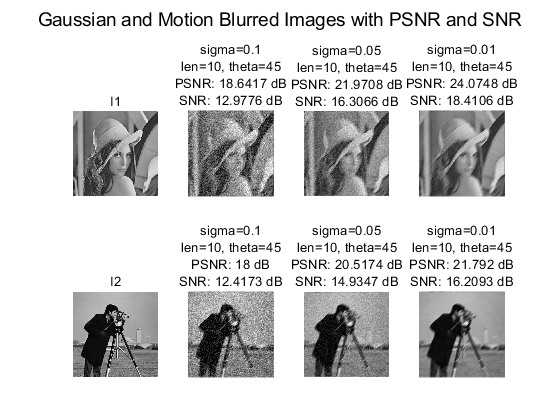

In [6]:
% 显示原图和加高斯噪声及运动模糊的图像
figure;

% 调整字体大小
font_size = 10;

% I1 图像及其高斯噪声 + 运动模糊图像
subplot(2,4,1), imshow(I1), title('I1', 'FontSize', font_size);
subplot(2,4,2), imshow(gaussian_motion_I1{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...  % len 和 theta 在同一行
    ['PSNR: ', num2str(gaussian_motion_I1_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,3), imshow(gaussian_motion_I1{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,4), imshow(gaussian_motion_I1{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I1_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I1_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% I2 图像及其高斯噪声 + 运动模糊图像
subplot(2,4,5), imshow(I2), title('I2', 'FontSize', font_size);
subplot(2,4,6), imshow(gaussian_motion_I2{1}), title({...
    'sigma=0.1', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(1, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(1, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,7), imshow(gaussian_motion_I2{2}), title({...
    'sigma=0.05', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(2, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(2, 2)), ' dB']}, 'FontSize', font_size);
subplot(2,4,8), imshow(gaussian_motion_I2{3}), title({...
    'sigma=0.01', ...
    'len=10, theta=45', ...
    ['PSNR: ', num2str(gaussian_motion_I2_snr(3, 1)), ' dB'], ...
    ['SNR: ', num2str(gaussian_motion_I2_snr(3, 2)), ' dB']}, 'FontSize', font_size);

% 添加总标题
sgtitle('Gaussian and Motion Blurred Images with PSNR and SNR', 'FontSize', 14);

## 1. Implement of the filters
We will first implement the inverse filter and Wiener filter. The result will be compared with those from the built-in functions provided by Python/Matlab/Octave.


### 1.1 Test implemented inverse filter

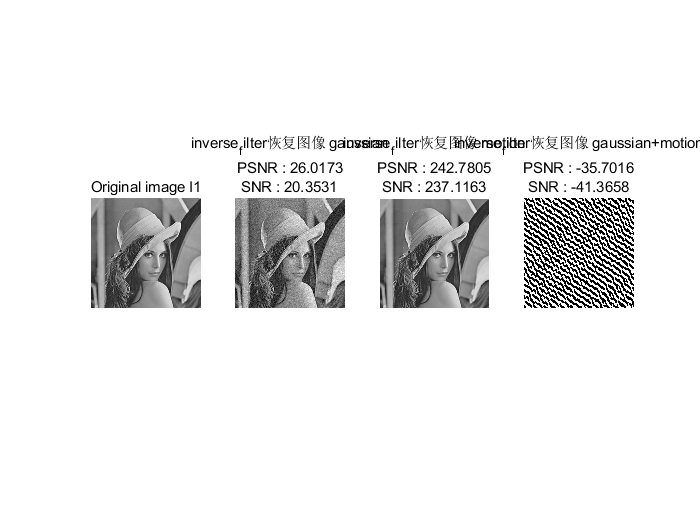

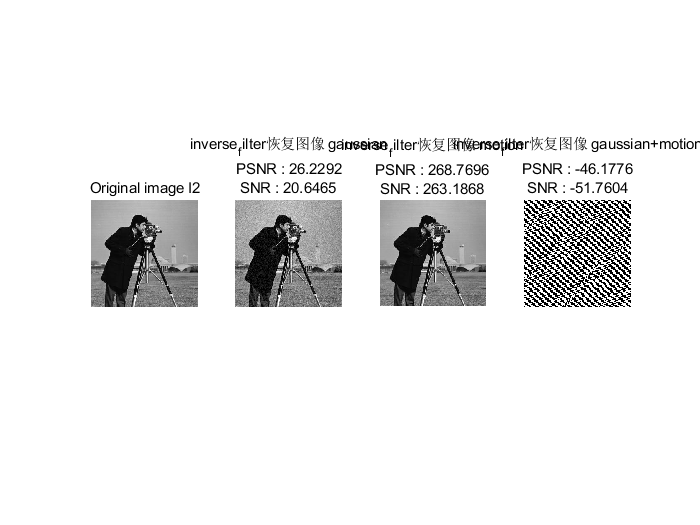

In [3]:
% The results of implemented inverse filters
unmodified_kernal = zeros(3);
unmodified_kernal(2, 2) = 1;

% inverse_filter I1
% Show the results
figure;
subplot(1, 4, 1); imshow(I1); title('Original image I1');

restore_img_I1 = inverse_filter(unmodified_kernal, gaussian_I1{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'inverse_filter恢复图像 gaussian', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = inverse_filter(h_motions_len{2}, motion_I1_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'inverse_filter恢复图像 motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = inverse_filter(h_motions_len{1}, gaussian_motion_I1{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'inverse_filter恢复图像 gaussian+motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% inverse_filter I2
% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('Original image I2');

restore_img_I2 = inverse_filter(unmodified_kernal, gaussian_I2{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'inverse_filter恢复图像 gaussian', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = inverse_filter(h_motions_len{2}, motion_I2_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'inverse_filter恢复图像 motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = inverse_filter(h_motions_len{1}, gaussian_motion_I2{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'inverse_filter恢复图像 gaussian+motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

### 1.2 Test implemented Wiener filter

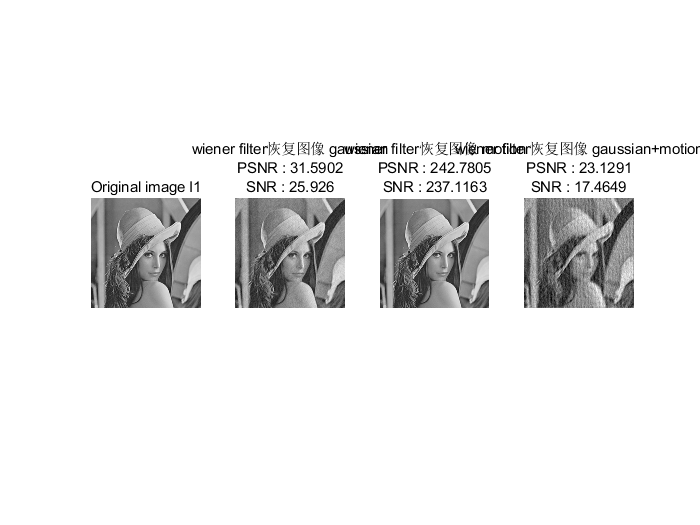

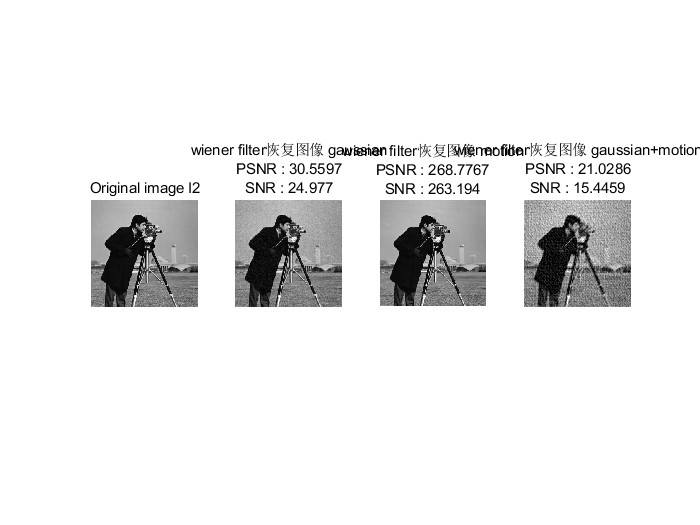

In [18]:
% The results of implemented Wiener filters

% wiener filter I1
% Show the results
figure;
subplot(1, 4, 1); imshow(I1); title('Original image I1');

restore_img_I1 = wiener_filter(gaussian_I1{2}, I1, gaussian_I1{2} - I1, unmodified_kernal);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({...
    'wiener filter恢复图像 gaussian', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener_filter(motion_I1_len{2}, I1, zeros(size(I1)), h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({...
    'wiener filter恢复图像 motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener_filter(gaussian_motion_I1{2}, I1, gaussian_I1{2} - I1, h_motions_len{1});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({...
    'wiener filter恢复图像 gaussian+motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

% wiener filter I2
% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('Original image I2');

restore_img_I2 = wiener_filter(gaussian_I2{2}, I2, gaussian_I2{2} - I2, unmodified_kernal);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({...
    'wiener filter恢复图像 gaussian', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener_filter(motion_I2_len{2}, I2, zeros(size(I2)), h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({...
    'wiener filter恢复图像 motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener_filter(gaussian_motion_I2{2}, I2, gaussian_I2{2} - I2, h_motions_len{1});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'wiener filter恢复图像 gaussian+motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

### 1.3 Apply built-in Matlab wiener filter to images

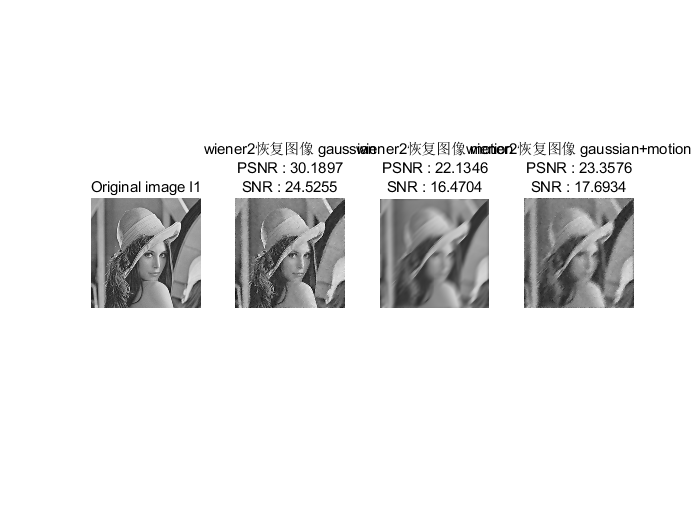

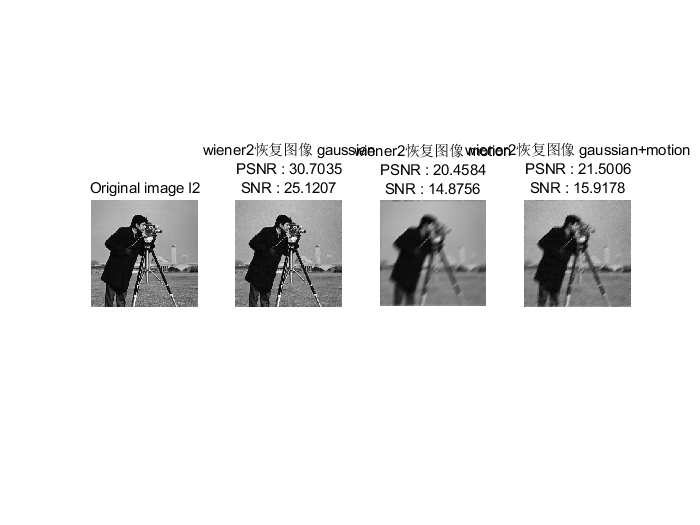

In [13]:
% Using built-in functions in Matlab

% 维纳滤波 wiener2 I1
% 显示结果
figure;
subplot(1, 4, 1); imshow(I1); title('Original image I1');
% subplot(2, 3, 2); imshow(gaussian_I1{2}); title({'退化图像', ['PSNR : ', num2str(gaussian_I1_snr(2, 1))], ['SNR : ', num2str(gaussian_I1_snr(2, 2))]});

restore_img_I1 = wiener2(gaussian_I1{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({'wiener2恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener2(motion_I1_len{2}, [5, 5]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({'wiener2恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = wiener2(gaussian_motion_I1{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({'wiener2恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

% 维纳滤波 wiener2 I2
% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('Original image I2');
% subplot(2, 3, 2); imshow(gaussian_I2{2}); title({'退化图像', ['PSNR : ', num2str(gaussian_I2_snr(2, 1))], ['SNR : ', num2str(gaussian_I2_snr(2, 2))]});

restore_img_I2 = wiener2(gaussian_I2{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({'wiener2恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener2(motion_I2_len{2}, [5, 5]);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({'wiener2恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = wiener2(gaussian_motion_I2{2}, [5, 5], gaussian_power(2));
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({'wiener2恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

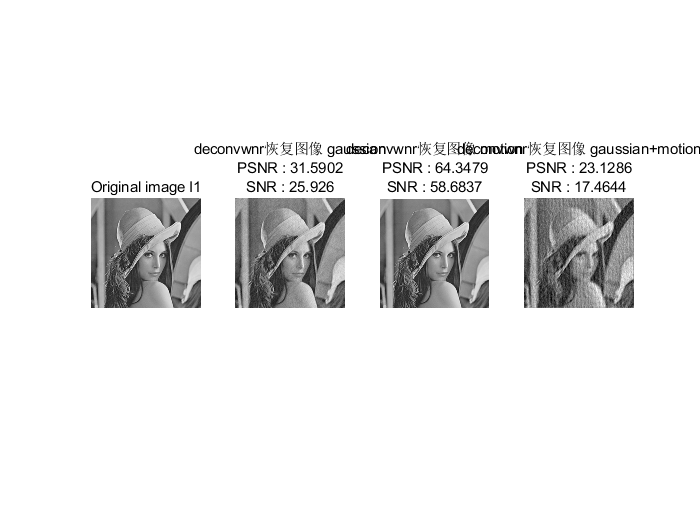

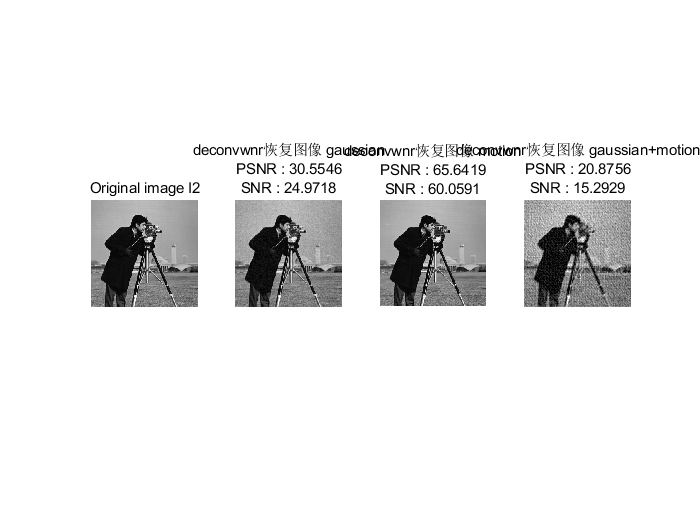

In [21]:
% 维纳滤波 deconvwnr I1
% signal_var = var(I1(:));
% NSR = gaussian_power(2) / signal_var;

% 计算噪声功率谱和图像功率谱
[M, N] = size(I1);
noise_power_spectrum = abs(fft2(gaussian_I1{2} - I1, M, N)).^2;  % 噪声功率谱
image_power_spectrum = abs(fft2(I1, M, N)).^2;        % 原始图像的功率谱
NSR = noise_power_spectrum ./ (image_power_spectrum); % 计算 NSR (噪声与信号比率)

% 显示结果
figure;
subplot(1, 4, 1); imshow(I1); title('Original image I1');

restore_img_I1 = deconvwnr(gaussian_I1{2}, unmodified_kernal, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 2); imshow(restore_img_I1); title({'deconvwnr恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = deconvwnr(motion_I1_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 3); imshow(restore_img_I1); title({'deconvwnr恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I1 = deconvwnr(gaussian_motion_I1{2}, h_motions_len{1}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);
subplot(1, 4, 4); imshow(restore_img_I1); title({'deconvwnr恢复图像 gaussian+motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

% 维纳滤波 deconvwnr I2
% signal_var = var(I2(:));
% NSR = gaussian_power(2) / signal_var;

% 计算噪声功率谱和图像功率谱
[M, N] = size(I2);
noise_power_spectrum = abs(fft2(gaussian_I2{2} - I2, M, N)).^2;  % 噪声功率谱
image_power_spectrum = abs(fft2(I2, M, N)).^2;        % 原始图像的功率谱
NSR = noise_power_spectrum ./ (image_power_spectrum); % 计算 NSR (噪声与信号比率)

% 显示结果
figure;
subplot(1, 4, 1); imshow(I2); title('Original image I2');

restore_img_I2 = deconvwnr(gaussian_I2{2}, unmodified_kernal, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 2); imshow(restore_img_I2); title({'deconvwnr恢复图像 gaussian', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = deconvwnr(motion_I2_len{2}, h_motions_len{2});
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 3); imshow(restore_img_I2); title({'deconvwnr恢复图像 motion', ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});

restore_img_I2 = deconvwnr(gaussian_motion_I2{2}, h_motions_len{1}, NSR);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I2, I2);
subplot(1, 4, 4); imshow(restore_img_I2); title({...
    'deconvwnr恢复图像 gaussian+motion', ...
    ['PSNR : ', num2str(restore_img_psnr)], ...
    ['SNR : ', num2str(restore_img_snr)]});

## 2. Gaussian noise
We will use different filters, including median filters, mean filters, Gaussian filters, bilateral filters, inverse filters and Wiener filters to try to remove the noise. For each filter we will apply different window sizes and compare their results. For the result, we will use PSNR to measure the restoration quality. And we will discuss the result also based on the grayscale histogram and spectrum. 


### 2.1 Median filter

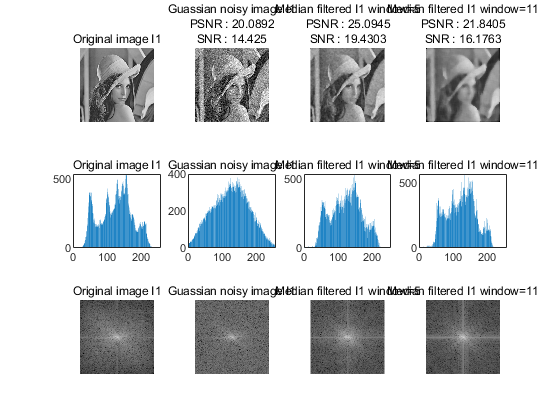

In [9]:
window_size = [5, 11];

% Median filters
median_I1 = cell(length(window_size));
median_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    median_I1{i} = medfilt2(gaussian_I1{1}, [window_size(i), window_size(i)]);
    [median_snr(i, 1), median_snr(i, 2)] = psnr(median_I1{i}, I1);
end

% Show the results of median filters
figure;
subplot(3, 4, 1); imshow(I1); title("Original image I1");
subplot(3, 4, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 4, 3); imshow(median_I1{1}); title({"Median filtered I1 window=5", ['PSNR : ', num2str(median_snr(1, 1))], ['SNR : ', num2str(median_snr(1, 2))]});
subplot(3, 4, 4); imshow(median_I1{2}); title({"Median filtered I1 window=11", ['PSNR : ', num2str(median_snr(2, 1))], ['SNR : ', num2str(median_snr(2, 2))]});
subplot(3, 4, 5); bar(imhist(I1)); title("Original image I1");
subplot(3, 4, 6); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 4, 7); bar(imhist(median_I1{1})); title("Median filtered I1 window=5");
subplot(3, 4, 8); bar(imhist(median_I1{2})); title("Median filtered I1 window=11");
subplot(3, 4, 9); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 4, 10); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 4, 11); imshow(to_frequency(median_I1{1}), []); title("Median filtered I1 window=5");
subplot(3, 4, 12); imshow(to_frequency(median_I1{2}), []); title("Median filtered I1 window=11");

### 2.2 Mean filter

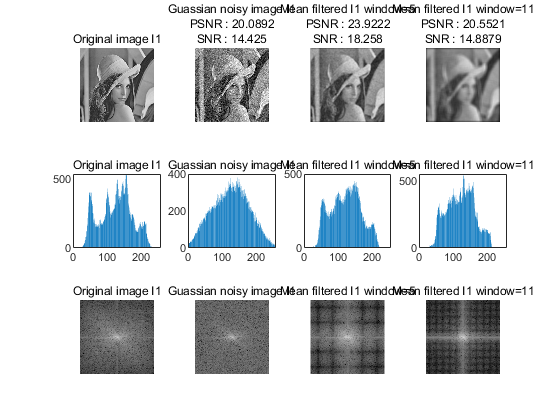

In [10]:
% mean filters
mean_I1 = cell(length(window_size));
mean_snr = zeros(length(window_size), 2);
for i = 1:length(window_size)
    mean_I1{i} = imfilter(gaussian_I1{1}, fspecial("average", window_size(i)));
    [mean_snr(i, 1), mean_snr(i, 2)] = psnr(mean_I1{i}, I1);
end

% Show the results of mean filters
figure;
subplot(3, 4, 1); imshow(I1); title("Original image I1");
subplot(3, 4, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 4, 3); imshow(mean_I1{1}); title({"Mean filtered I1 window=5", ['PSNR : ', num2str(mean_snr(1, 1))], ['SNR : ', num2str(mean_snr(1, 2))]});
subplot(3, 4, 4); imshow(mean_I1{2}); title({"Mean filtered I1 window=11", ['PSNR : ', num2str(mean_snr(2, 1))], ['SNR : ', num2str(mean_snr(2, 2))]});
subplot(3, 4, 5); bar(imhist(I1)); title("Original image I1");
subplot(3, 4, 6); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 4, 7); bar(imhist(mean_I1{1})); title("Mean filtered I1 window=5");
subplot(3, 4, 8); bar(imhist(mean_I1{2})); title("Mean filtered I1 window=11");
subplot(3, 4, 9); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 4, 10); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 4, 11); imshow(to_frequency(mean_I1{1}), []); title("Mean filtered I1 window=5");
subplot(3, 4, 12); imshow(to_frequency(mean_I1{2}), []); title("Mean filtered I1 window=11");

### 2.3 Gaussian filter

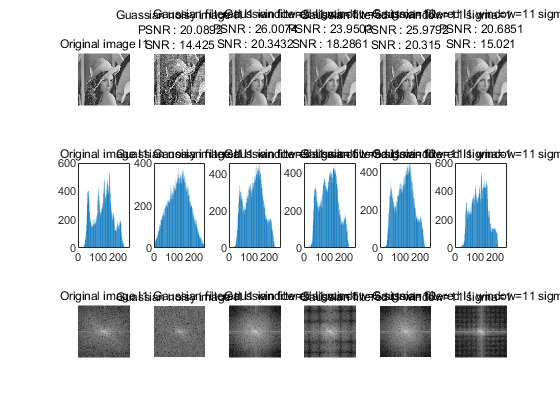

In [11]:
% Gaussian filters
sigma = [1, 10];
gau_filtered_len = length(window_size) * length(sigma);
gaussian_filtered_I1 = cell(gau_filtered_len);
gaussian_filtered_snr = zeros(gau_filtered_len, 2);
for i = 1:length(window_size)
    for j = 1:length(sigma)
        index = (i-1) * length(sigma) + j;
        gaussian_filtered_I1{index} = imfilter(gaussian_I1{1}, fspecial("gaussian", window_size(i), sigma(j)));
        [gaussian_filtered_snr(index, 1), gaussian_filtered_snr(index, 2)] = psnr(gaussian_filtered_I1{index}, I1);
    end
end

% Show the results of gaussian filters
figure;
subplot(3, 6, 1); imshow(I1); title("Original image I1");
subplot(3, 6, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 6, 3); imshow(gaussian_filtered_I1{1}); title({"Gaussian filtered I1 window=5 sigma=1", ['PSNR : ', num2str(gaussian_filtered_snr(1, 1))], ['SNR : ', num2str(gaussian_filtered_snr(1, 2))]});
subplot(3, 6, 4); imshow(gaussian_filtered_I1{2}); title({"Gaussian filtered I1 window=5 sigma=10", ['PSNR : ', num2str(gaussian_filtered_snr(2, 1))], ['SNR : ', num2str(gaussian_filtered_snr(2, 2))]});
subplot(3, 6, 5); imshow(gaussian_filtered_I1{1}); title({"Gaussian filtered I1 window=11 sigma=1", ['PSNR : ', num2str(gaussian_filtered_snr(3, 1))], ['SNR : ', num2str(gaussian_filtered_snr(3, 2))]});
subplot(3, 6, 6); imshow(gaussian_filtered_I1{2}); title({"Gaussian filtered I1 window=11 sigma=10", ['PSNR : ', num2str(gaussian_filtered_snr(4, 1))], ['SNR : ', num2str(gaussian_filtered_snr(4, 2))]});
subplot(3, 6, 7); bar(imhist(I1)); title("Original image I1");
subplot(3, 6, 8); bar(imhist(gaussian_I1{1})); title("Guassian noisy image I1");
subplot(3, 6, 9); bar(imhist(gaussian_filtered_I1{1})); title("Gaussian filtered I1 window=5 sigma=1");
subplot(3, 6, 10); bar(imhist(gaussian_filtered_I1{2})); title("Gaussian filtered I1 window=5 sigma=10");
subplot(3, 6, 11); bar(imhist(gaussian_filtered_I1{3})); title("Gaussian filtered I1 window=11 sigma=1");
subplot(3, 6, 12); bar(imhist(gaussian_filtered_I1{4})); title("Gaussian filtered I1 window=11 sigma=10");
subplot(3, 6, 13); imshow(to_frequency(I1), []); title("Original image I1");
subplot(3, 6, 14); imshow(to_frequency(gaussian_I1{1}), []); title("Guassian noisy image I1");
subplot(3, 6, 15); imshow(to_frequency(gaussian_filtered_I1{1}), []); title("Gaussian filtered I1 window=5 sigma=1");
subplot(3, 6, 16); imshow(to_frequency(gaussian_filtered_I1{2}), []); title("Gaussian filtered I1 window=5 sigma=10");
subplot(3, 6, 17); imshow(to_frequency(gaussian_filtered_I1{3}), []); title("Gaussian filtered I1 window=11 sigma=1");
subplot(3, 6, 18); imshow(to_frequency(gaussian_filtered_I1{4}), []); title("Gaussian filtered I1 window=11 sigma=10");

### 2.4 Bilateral filter

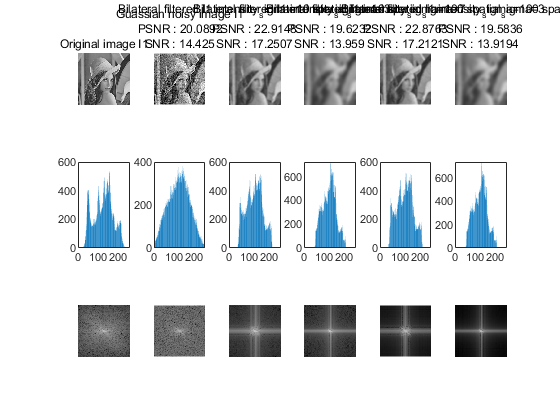

In [12]:
% Bilateral filters
intensity_sigma = [10, 100];
spatial_sigma = [3, 7];
bil_filtered_len = length(intensity_sigma) * length(spatial_sigma);
bil_filtered_I1 = cell(bil_filtered_len);
bil_filtered_snr = zeros(bil_filtered_len, 2);
for i = 1:length(intensity_sigma)
    for j = 1:length(spatial_sigma)
        index = (i-1) * length(spatial_sigma) + j;
        bil_filtered_I1{index} = imbilatfilt(gaussian_I1{1}, intensity_sigma(i), spatial_sigma(j));
        [bil_filtered_snr(index, 1), bil_filtered_snr(index, 2)] = psnr(bil_filtered_I1{index}, I1);
    end
end

% Show the results of bilateral filters
figure;
subplot(3, 6, 1); imshow(I1); title("Original image I1");
subplot(3, 6, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 6, 3); imshow(bil_filtered_I1{1}); title({"Bilateral filtered I1 intensity_sigma=10 spatial_sigma=3", ['PSNR : ', num2str(bil_filtered_snr(1, 1))], ['SNR : ', num2str(bil_filtered_snr(1, 2))]});
subplot(3, 6, 4); imshow(bil_filtered_I1{2}); title({"Bilateral filtered I1 intensity_sigma=10 spatial_sigma=7", ['PSNR : ', num2str(bil_filtered_snr(2, 1))], ['SNR : ', num2str(bil_filtered_snr(2, 2))]});
subplot(3, 6, 5); imshow(bil_filtered_I1{1}); title({"Bilateral filtered I1 intensity_sigma=100 spatial_sigma=3", ['PSNR : ', num2str(bil_filtered_snr(3, 1))], ['SNR : ', num2str(bil_filtered_snr(3, 2))]});
subplot(3, 6, 6); imshow(bil_filtered_I1{2}); title({"Bilateral filtered I1 intensity_sigma=100 spatial_sigma=7", ['PSNR : ', num2str(bil_filtered_snr(4, 1))], ['SNR : ', num2str(bil_filtered_snr(4, 2))]});
subplot(3, 6, 7); bar(imhist(I1));
subplot(3, 6, 8); bar(imhist(gaussian_I1{1}));
subplot(3, 6, 9); bar(imhist(bil_filtered_I1{1}));
subplot(3, 6, 10); bar(imhist(bil_filtered_I1{2}));
subplot(3, 6, 11); bar(imhist(bil_filtered_I1{3}));
subplot(3, 6, 12); bar(imhist(bil_filtered_I1{4}));
subplot(3, 6, 13); imshow(to_frequency(I1), []);
subplot(3, 6, 14); imshow(to_frequency(gaussian_I1{1}), []);
subplot(3, 6, 15); imshow(to_frequency(bil_filtered_I1{1}), []);
subplot(3, 6, 16); imshow(to_frequency(bil_filtered_I1{2}), []);
subplot(3, 6, 17); imshow(to_frequency(bil_filtered_I1{3}), []);
subplot(3, 6, 18); imshow(to_frequency(bil_filtered_I1{4}), []);

### 2.5 Inverse filter

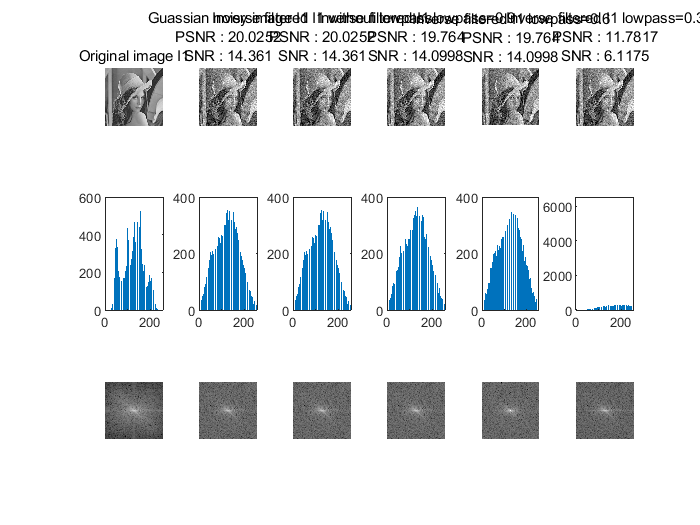

In [5]:
% inverse filters
inverse_wpass = [0.9, 0.6, 0.3];
inverse_filtered_len = length(inverse_wpass) + 1;
inverse_filtered_I1 = cell(inverse_filtered_len);
inverse_filtered_snr = zeros(inverse_filtered_len, 2);

inverse_filtered_I1{1} = inverse_filter(unmodified_kernal, gaussian_I1{1});
[inverse_filtered_snr(1, 1), inverse_filtered_snr(1, 2)] = psnr(inverse_filtered_I1{1}, I1);
for i = 2:inverse_filtered_len
    inverse_filtered_I1{i} = inverse_filter(unmodified_kernal, gaussian_I1{1}, inverse_wpass(i-1));
    [inverse_filtered_snr(i, 1), inverse_filtered_snr(i, 2)] = psnr(inverse_filtered_I1{i}, I1);
end

% Show the results of inverse filters
figure;
subplot(3, 6, 1); imshow(I1); title("Original image I1");
subplot(3, 6, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ...
    ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 6, 3); imshow(inverse_filtered_I1{1}); title({...
    "Inverse filtered I1 without lowpass", ...
    ['PSNR : ', num2str(inverse_filtered_snr(1, 1))], ['SNR : ', num2str(inverse_filtered_snr(1, 2))]});
subplot(3, 6, 4); imshow(inverse_filtered_I1{2}); title({...
    "Inverse filtered I1 lowpass=0.9", ...
    ['PSNR : ', num2str(inverse_filtered_snr(2, 1))], ['SNR : ', num2str(inverse_filtered_snr(2, 2))]});
subplot(3, 6, 5); imshow(inverse_filtered_I1{1}); title({...
    "Inverse filtered I1 lowpass=0.6", ...
    ['PSNR : ', num2str(inverse_filtered_snr(3, 1))], ['SNR : ', num2str(inverse_filtered_snr(3, 2))]});
subplot(3, 6, 6); imshow(inverse_filtered_I1{2}); title({...
    "Inverse filtered I1 lowpass=0.3", ...
    ['PSNR : ', num2str(inverse_filtered_snr(4, 1))], ['SNR : ', num2str(inverse_filtered_snr(4, 2))]});
subplot(3, 6, 7); bar(imhist(I1));
subplot(3, 6, 8); bar(imhist(gaussian_I1{1}));
subplot(3, 6, 9); bar(imhist(inverse_filtered_I1{1}));
subplot(3, 6, 10); bar(imhist(inverse_filtered_I1{2}));
subplot(3, 6, 11); bar(imhist(inverse_filtered_I1{3}));
subplot(3, 6, 12); bar(imhist(inverse_filtered_I1{4}));
subplot(3, 6, 13); imshow(to_frequency(I1), []);
subplot(3, 6, 14); imshow(to_frequency(gaussian_I1{1}), []);
subplot(3, 6, 15); imshow(to_frequency(inverse_filtered_I1{1}), []);
subplot(3, 6, 16); imshow(to_frequency(inverse_filtered_I1{2}), []);
subplot(3, 6, 17); imshow(to_frequency(inverse_filtered_I1{3}), []);
subplot(3, 6, 18); imshow(to_frequency(inverse_filtered_I1{4}), []);

### 2.6 Wiener filter

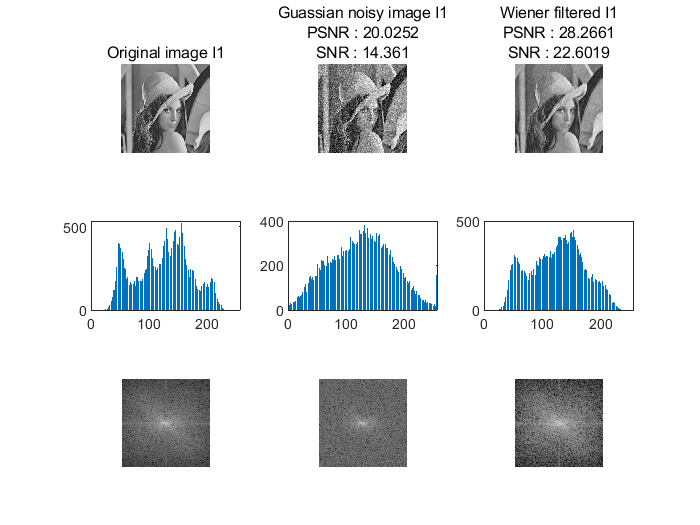

In [9]:
% Wiener filters
restore_img_I1 = wiener_filter(gaussian_I1{1}, I1, gaussian_I1{1} - I1, unmodified_kernal);
[restore_img_psnr, restore_img_snr] = psnr(restore_img_I1, I1);

% Show the results of wiener filters
figure;
subplot(3, 3, 1); imshow(I1); title("Original image I1");
subplot(3, 3, 2); imshow(gaussian_I1{1}); title({"Guassian noisy image I1", ...
    ['PSNR : ', num2str(gaussian_I1_snr(1, 1))], ['SNR : ', num2str(gaussian_I1_snr(1, 2))]});
subplot(3, 3, 3); imshow(restore_img_I1); title({"Wiener filtered I1", ...
    ['PSNR : ', num2str(restore_img_psnr)], ['SNR : ', num2str(restore_img_snr)]});
subplot(3, 3, 4); bar(imhist(I1));
subplot(3, 3, 5); bar(imhist(gaussian_I1{1}));
subplot(3, 3, 6); bar(imhist(restore_img_I1));
subplot(3, 3, 7); imshow(to_frequency(I1), []);
subplot(3, 3, 8); imshow(to_frequency(gaussian_I1{1}), []);
subplot(3, 3, 9); imshow(to_frequency(restore_img_I1), []);

## 3. Motion blur and Restoration Using Inverse Filter
We will use inverse filters to try to restore the images. We will use the same method as above to assess the result.


### 3.1 Test Inverse Filter Using I1
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

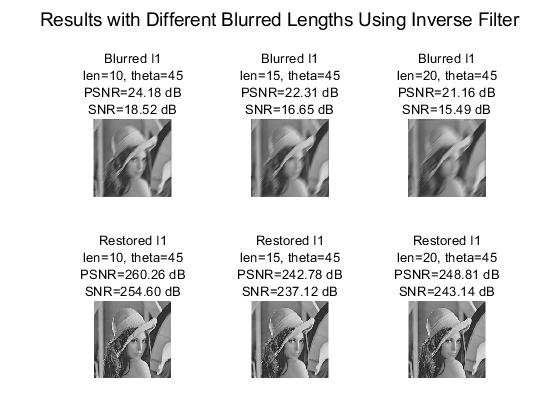

In [72]:
% 定义变量
motion_I1_len = cell(length(motion_len), 1);                 % 保存运动模糊后的图像
motion_I1_len_snr = zeros(length(motion_len), 2);            % 保存模糊图像的 PSNR 和 SNR

restored_I1_len = cell(length(motion_len), 1);               % 保存恢复后的图像
psnr_values_restored_len = zeros(length(motion_len), 1);     % 保存恢复图像的 PSNR
snr_values_restored_len = zeros(length(motion_len), 1);      % 保存恢复图像的 SNR

% 对不同的模糊长度进行处理
for i = 1:length(motion_len)
    % 对 I1 施加运动模糊
    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    
    % 计算模糊图像的 PSNR 和 SNR
    [motion_I1_len_snr(i, 1), motion_I1_len_snr(i, 2)] = psnr(motion_I1_len{i}, I1);
    
    % 使用逆滤波恢复图像 (基于模糊图像 motion_I1_len{i})
    restored_I1_len{i} = inverse_filter(h_motions_len{i}, motion_I1_len{i});
    restored_I1_len{i} = im2double(restored_I1_len{i});
    restored_I1_len{i}(~isfinite(restored_I1_len{i})) = 0;  % 处理无穷值
    
    % 计算恢复图像的 PSNR 和 SNR
    [psnr_values_restored_len(i), snr_values_restored_len(i)] = psnr(restored_I1_len{i}, I1);
end

% 绘制模糊图像和恢复结果
figure;
for i = 1:length(motion_len)
    % 绘制模糊图像
    subplot(2, length(motion_len), i);
    imshow(motion_I1_len{i});
    title({['Blurred I1'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(motion_I1_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I1_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_len)
    % 绘制恢复后的图像
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I1_len{i});
    title({['Restored I1'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr_values_restored_len(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加总标题
sgtitle('Results with Different Blurred Lengths Using Inverse Filter', 'FontSize', 14);

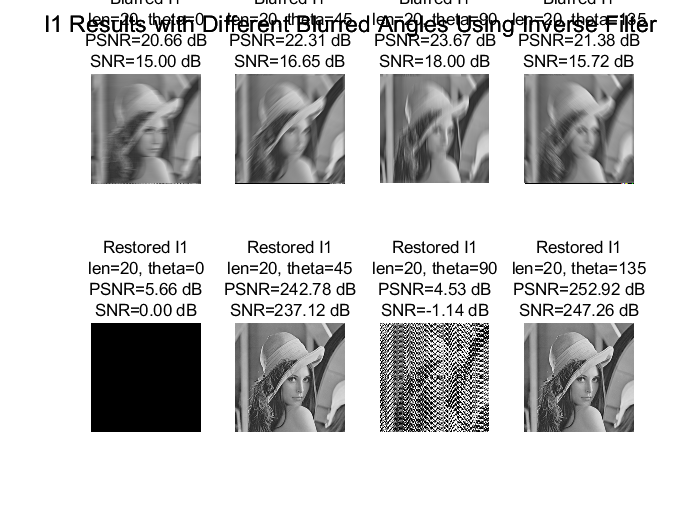

In [23]:
% 定义 I1 不同 theta 的变量
motion_I1_theta = cell(length(motion_theta), 1);                 % 保存 I1 的运动模糊后的图像 (不同 theta)
motion_I1_theta_snr = zeros(length(motion_theta), 2);            % 保存 I1 的模糊图像的 PSNR 和 SNR

restored_I1_theta = cell(length(motion_theta), 1);               % 保存 I1 的恢复后的图像 (不同 theta)
psnr_values_restored_theta = zeros(length(motion_theta), 1);     % 保存恢复图像的 PSNR
snr_values_restored_theta = zeros(length(motion_theta), 1);      % 保存恢复图像的 SNR

% 对不同的模糊角度进行处理
for i = 1:length(motion_theta)
    % 对 I1 施加运动模糊 (不同 theta)
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    
    % 计算模糊图像的 PSNR 和 SNR
    [motion_I1_theta_snr(i, 1), motion_I1_theta_snr(i, 2)] = psnr(motion_I1_theta{i}, I1);
    
    % 使用逆滤波恢复图像 (基于模糊图像 motion_I1_theta{i})
    restored_I1_theta{i} = inverse_filter(h_motions_theta{i}, motion_I1_theta{i});
    restored_I1_theta{i} = im2double(restored_I1_theta{i});
    restored_I1_theta{i}(~isfinite(restored_I1_theta{i})) = 0;  % 处理无穷值
    
    % 计算恢复图像的 PSNR 和 SNR
    [psnr_values_restored_theta(i), snr_values_restored_theta(i)] = psnr(restored_I1_theta{i}, I1);
end

% 绘制 I1 不同角度 (theta) 下的模糊图像和恢复结果
figure;
for i = 1:length(motion_theta)
    % 绘制模糊图像
    subplot(2, length(motion_theta), i);
    imshow(motion_I1_theta{i});
    title({['Blurred I1'], ['len=20, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(motion_I1_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I1_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_theta)
    % 绘制恢复后的图像
    subplot(2, length(motion_theta), i + length(motion_theta));
    imshow(restored_I1_theta{i});
    title({['Restored I1'], ['len=20, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加总标题
sgtitle('I1 Results with Different Blurred Angles Using Inverse Filter', 'FontSize', 14);

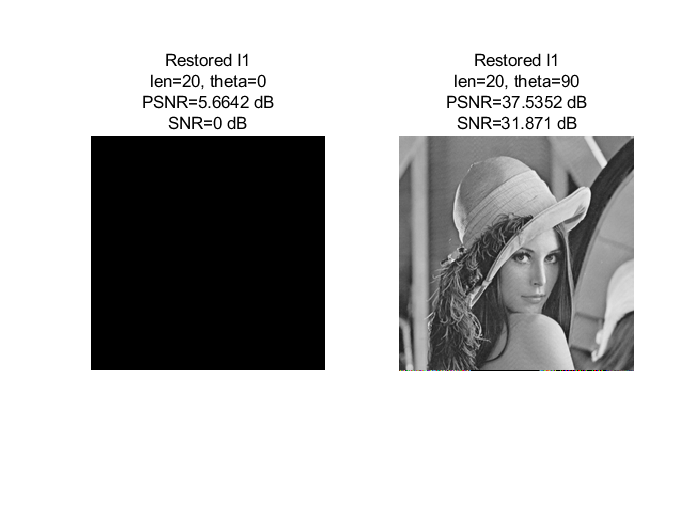

In [53]:
% 绘制恢复后的图像 对于0和90度 需要特殊处理
figure;
restored_I1 = inverse_filter(h_motions_theta{1}, motion_I1_theta{1}, 0.9);
restored_I1(~isfinite(restored_I1)) = 0;  % 处理无穷值
[res_psnr, res_snr] = psnr(restored_I1, I1);
subplot(1, 2, 1);
imshow(restored_I1);
title({['Restored I1'], ['len=20, theta=', num2str(motion_theta(1))], ...
       ['PSNR=', num2str(res_psnr), ' dB'], ...
       ['SNR=', num2str(res_snr), ' dB']}, 'FontSize', 10);

restored_I1 = inverse_filter(h_motions_theta{3}, motion_I1_theta{3}, 0.9);
restored_I1(~isfinite(restored_I1)) = 0;  % 处理无穷值
[res_psnr, res_snr] = psnr(restored_I1, I1);
subplot(1, 2, 2);
imshow(restored_I1);
title({['Restored I1'], ['len=20, theta=', num2str(motion_theta(3))], ...
        ['PSNR=', num2str(res_psnr), ' dB'], ...
        ['SNR=', num2str(res_snr), ' dB']}, 'FontSize', 10);

### 3.2 Test Inverse Filter Using I2
Try with motion blurred I1 with different Thetas and Lengths of Motion Blur

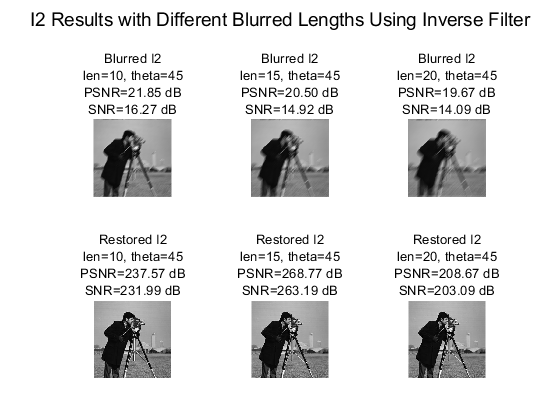

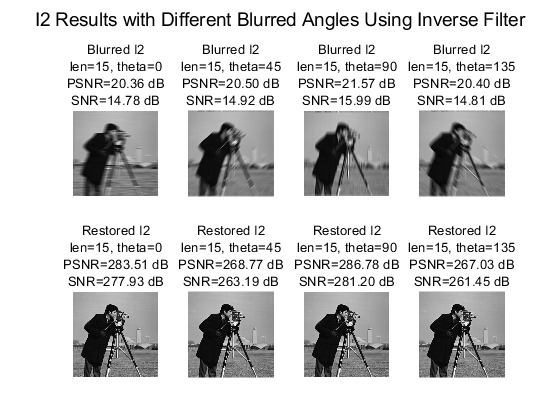

In [79]:
% 定义 I2 的变量
motion_I2_len = cell(length(motion_len), 1);                 % 保存 I2 的运动模糊后的图像
motion_I2_len_snr = zeros(length(motion_len), 2);            % 保存 I2 的模糊图像的 PSNR 和 SNR

restored_I2_len = cell(length(motion_len), 1);               % 保存 I2 的恢复后的图像
psnr_values_restored_len_I2 = zeros(length(motion_len), 1);  % 保存 I2 的恢复图像的 PSNR
snr_values_restored_len_I2 = zeros(length(motion_len), 1);   % 保存 I2 的恢复图像的 SNR

% 对不同的模糊长度进行处理
for i = 1:length(motion_len)
    % 对 I2 施加运动模糊
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    
    % 计算模糊图像的 PSNR 和 SNR
    [motion_I2_len_snr(i, 1), motion_I2_len_snr(i, 2)] = psnr(motion_I2_len{i}, I2);
    
    % 使用逆滤波恢复图像 (基于模糊图像 motion_I2_len{i})
    restored_I2_len{i} = inverse_filter(h_motions_len{i}, motion_I2_len{i});
    restored_I2_len{i} = im2double(restored_I2_len{i});
    restored_I2_len{i}(~isfinite(restored_I2_len{i})) = 0;  % 处理无穷值
    
    % 计算恢复图像的 PSNR 和 SNR
    [psnr_values_restored_len_I2(i), snr_values_restored_len_I2(i)] = psnr(restored_I2_len{i}, I2);
end

% 绘制 I2 模糊图像和恢复结果
figure;
for i = 1:length(motion_len)
    % 绘制 I2 的模糊图像
    subplot(2, length(motion_len), i);
    imshow(motion_I2_len{i});
    title({['Blurred I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(motion_I2_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I2_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_len)
    % 绘制 I2 恢复后的图像
    subplot(2, length(motion_len), i + length(motion_len));
    imshow(restored_I2_len{i});
    title({['Restored I2'], ['len=', num2str(motion_len(i)), ', theta=45'], ...
           ['PSNR=', num2str(psnr_values_restored_len_I2(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_len_I2(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加总标题
sgtitle('I2 Results with Different Blurred Lengths Using Inverse Filter', 'FontSize', 14);

% 定义 I2 不同 theta 的变量
motion_I2_theta = cell(length(motion_theta), 1);                 % 保存 I2 的运动模糊后的图像 (不同 theta)
motion_I2_theta_snr = zeros(length(motion_theta), 2);            % 保存 I2 的模糊图像的 PSNR 和 SNR

restored_I2_theta = cell(length(motion_theta), 1);               % 保存 I2 的恢复后的图像 (不同 theta)
psnr_values_restored_theta_I2 = zeros(length(motion_theta), 1);  % 保存 I2 的恢复图像的 PSNR
snr_values_restored_theta_I2 = zeros(length(motion_theta), 1);   % 保存 I2 的恢复图像的 SNR

% 对不同的模糊角度进行处理
for i = 1:length(motion_theta)
    % 对 I2 施加运动模糊 (不同 theta)
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    
    % 计算模糊图像的 PSNR 和 SNR
    [motion_I2_theta_snr(i, 1), motion_I2_theta_snr(i, 2)] = psnr(motion_I2_theta{i}, I2);
    
    % 使用逆滤波恢复图像 (基于模糊图像 motion_I2_theta{i})
    restored_I2_theta{i} = inverse_filter(h_motions_theta{i}, motion_I2_theta{i});
    restored_I2_theta{i} = im2double(restored_I2_theta{i});
    restored_I2_theta{i}(~isfinite(restored_I2_theta{i})) = 0;  % 处理无穷值
    
    % 计算恢复图像的 PSNR 和 SNR
    [psnr_values_restored_theta_I2(i), snr_values_restored_theta_I2(i)] = psnr(restored_I2_theta{i}, I2);
end

% 绘制 I2 不同角度 (theta) 下的模糊图像和恢复结果
figure;
for i = 1:length(motion_theta)
    % 绘制 I2 的模糊图像
    subplot(2, length(motion_theta), i);
    imshow(motion_I2_theta{i});
    title({['Blurred I2'], ['len=15, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(motion_I2_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(motion_I2_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
end

for i = 1:length(motion_theta)
    % 绘制 I2 恢复后的图像
    subplot(2, length(motion_theta), i + length(motion_theta));
    imshow(restored_I2_theta{i});
    title({['Restored I2'], ['len=15, theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_theta_I2(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_theta_I2(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加总标题
sgtitle('I2 Results with Different Blurred Angles Using Inverse Filter', 'FontSize', 14);

## 4. Motion blur + Gaussian noise
We will use inverse filters and Wiener filters to try to restore the images. We will use the same method as above to assess the result.


### 4.1 Wiener Filter for Different Lengths of Motion Blur


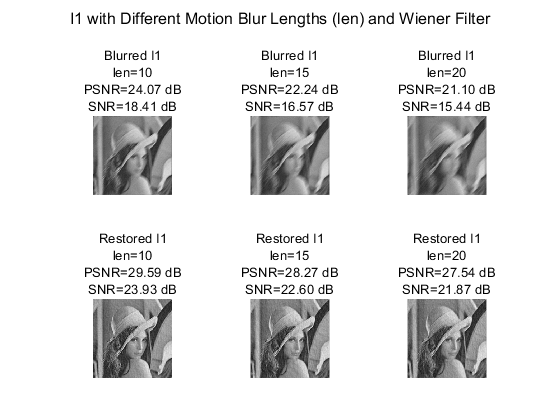

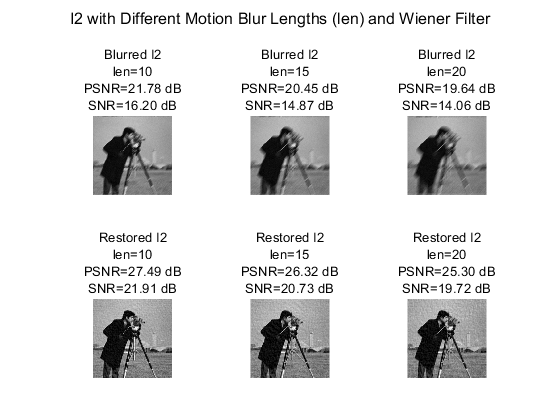

In [89]:
%% -----------------------------I1----------------------------

% 定义变量
motion_I1_len = cell(length(motion_len), 1);                      % 保存运动模糊图像
gaussian_motion_I1_len = cell(length(motion_len), 1);             % 保存添加高斯噪声的图像
gaussian_motion_I1_len_snr = zeros(length(motion_len), 2);        % 保存模糊图像的 PSNR 和 SNR
fixed_gaussian_sigma = gaussian_sigma(3);                         % 使用第三个 sigma 的高斯噪声
fixed_gaussian_power = fixed_gaussian_sigma.^2;                   % 噪声功率
restored_I1_len = cell(length(motion_len), 1);                    % 保存恢复的图像
psnr_values_restored_I1_len = zeros(length(motion_len), 1);       % 保存恢复图像的 PSNR
snr_values_restored_I1_len = zeros(length(motion_len), 1);        % 保存恢复图像的 SNR

h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));
end

% 施加运动模糊并添加噪声
for i = 1:length(motion_len)
    % 对 I1 施加运动模糊

    motion_I1_len{i} = imfilter(I1, h_motions_len{i}, 'conv', 'same', 'circular');
    gaussian_I1 = imnoise(I1, 'gaussian', 0, fixed_gaussian_power); % 添加高斯噪声
    gaussian_motion_I1_len{i} = imnoise(motion_I1_len{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I1_len_snr(i, 1), gaussian_motion_I1_len_snr(i, 2)] = psnr(gaussian_motion_I1_len{i}, I1); % 计算模糊图像的 PSNR 和 SNR
    noise_component = gaussian_motion_I1_len{i} - motion_I1_len{i}; % 提取噪声分量（噪声图像减去模糊图像）
    restored_I1_len{i} = wiener_filter(gaussian_motion_I1_len{i}, I1, noise_component, h_motions_len{i});   % 使用维纳滤波恢复图像
    [psnr_values_restored_I1_len(i), snr_values_restored_I1_len(i)] = psnr(restored_I1_len{i}, I1);         % 计算恢复图像的 PSNR 和 SNR
end

% 绘制 I1 不同 len 的模糊和恢复结果
figure;
for i = 1:length(motion_len)
    % 显示添加噪声和运动模糊的图像
    subplot(2, length(motion_len), i);
    imshow(gaussian_motion_I1_len{i});
    title({['Blurred I1'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(gaussian_motion_I1_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I1_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % 显示恢复后的图像
    subplot(2, length(motion_len), length(motion_len) + i);
    imshow(restored_I1_len{i});
    title({['Restored I1'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I1_len(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I1_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加图像的总标题
sgtitle('I1 with Different Motion Blur Lengths (len) and Wiener Filter', 'FontSize', 12);

%% -------------------------I2-------------------------------

% 定义变量
motion_I2_len = cell(length(motion_len), 1);                      % 保存运动模糊图像
gaussian_motion_I2_len = cell(length(motion_len), 1);             % 保存添加高斯噪声的图像
gaussian_motion_I2_len_snr = zeros(length(motion_len), 2);        % 保存模糊图像的 PSNR 和 SNR
restored_I2_len = cell(length(motion_len), 1);                    % 保存恢复的图像
psnr_values_restored_I2_len = zeros(length(motion_len), 1);       % 保存恢复图像的 PSNR
snr_values_restored_I2_len = zeros(length(motion_len), 1);        % 保存恢复图像的 SNR

h_motions_len = cell(length(motion_len));
for i = 1:length(motion_len)
    h_motions_len{i} = fspecial('motion', motion_len(i), motion_theta(2));  % 固定角度 theta(2)
end

% 施加运动模糊并添加噪声
for i = 1:length(motion_len)
    % 对 I2 施加运动模糊
    motion_I2_len{i} = imfilter(I2, h_motions_len{i}, 'conv', 'same', 'circular');
    gaussian_I2 = imnoise(I2, 'gaussian', 0, fixed_gaussian_power); % 添加高斯噪声
    gaussian_motion_I2_len{i} = imnoise(motion_I2_len{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I2_len_snr(i, 1), gaussian_motion_I2_len_snr(i, 2)] = psnr(gaussian_motion_I2_len{i}, I2); % 计算模糊图像的 PSNR 和 SNR
    noise_component = gaussian_motion_I2_len{i} - motion_I2_len{i}; % 提取噪声分量（噪声图像减去模糊图像）
    restored_I2_len{i} = wiener_filter(gaussian_motion_I2_len{i}, I2, noise_component, h_motions_len{i});   % 使用维纳滤波恢复图像
    [psnr_values_restored_I2_len(i), snr_values_restored_I2_len(i)] = psnr(restored_I2_len{i}, I2);         % 计算恢复图像的 PSNR 和 SNR
end

% 绘制 I2 不同 len 的模糊和恢复结果
figure;
for i = 1:length(motion_len)
    % 显示添加噪声和运动模糊的图像
    subplot(2, length(motion_len), i);
    imshow(gaussian_motion_I2_len{i});
    title({['Blurred I2'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(gaussian_motion_I2_len_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I2_len_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % 显示恢复后的图像
    subplot(2, length(motion_len), length(motion_len) + i);
    imshow(restored_I2_len{i});
    title({['Restored I2'], ['len=', num2str(motion_len(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I2_len(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I2_len(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加图像的总标题
sgtitle('I2 with Different Motion Blur Lengths (len) and Wiener Filter', 'FontSize', 12);

### 4.2 Wiener Filter for Different Angles of Motion Blur


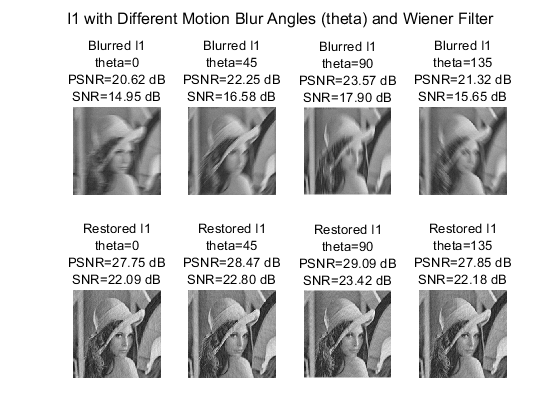

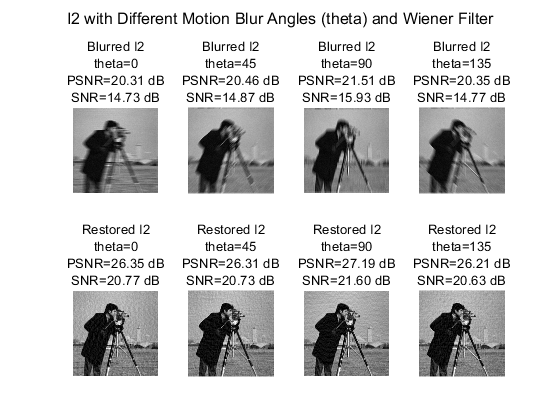

In [91]:
% 定义变量
motion_I1_theta = cell(length(motion_theta), 1);                  % 保存运动模糊图像
gaussian_motion_I1_theta = cell(length(motion_theta), 1);         % 保存添加高斯噪声的图像
gaussian_motion_I1_theta_snr = zeros(length(motion_theta), 2);    % 保存模糊图像的 PSNR 和 SNR
restored_I1_theta = cell(length(motion_theta), 1);                % 保存恢复的图像
psnr_values_restored_I1_theta = zeros(length(motion_theta), 1);   % 保存恢复图像的 PSNR
snr_values_restored_I1_theta = zeros(length(motion_theta), 1);    % 保存恢复图像的 SNR

h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));  % 固定长度 len(2)
end

% 施加运动模糊并添加噪声
for i = 1:length(motion_theta)
    % 对 I1 施加运动模糊
    motion_I1_theta{i} = imfilter(I1, h_motions_theta{i}, 'conv', 'same', 'circular');
    gaussian_I1 = imnoise(I1, 'gaussian', 0, fixed_gaussian_power); % 添加高斯噪声
    gaussian_motion_I1_theta{i} = imnoise(motion_I1_theta{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I1_theta_snr(i, 1), gaussian_motion_I1_theta_snr(i, 2)] = psnr(gaussian_motion_I1_theta{i}, I1); % 计算模糊图像的 PSNR 和 SNR
    noise_component = gaussian_motion_I1_theta{i} - motion_I1_theta{i}; % 提取噪声分量（噪声图像减去模糊图像）
    restored_I1_theta{i} = wiener_filter(gaussian_motion_I1_theta{i}, I1, noise_component, h_motions_theta{i}); % 使用维纳滤波恢复图像
    [psnr_values_restored_I1_theta(i), snr_values_restored_I1_theta(i)] = psnr(restored_I1_theta{i}, I1);       % 计算恢复图像的 PSNR 和 SNR
end

% 绘制 I1 不同 theta 的模糊和恢复结果
figure;
for i = 1:length(motion_theta)
    % 显示添加噪声和运动模糊的图像
    subplot(2, length(motion_theta), i);
    imshow(gaussian_motion_I1_theta{i});
    title({['Blurred I1'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(gaussian_motion_I1_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I1_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % 显示恢复后的图像
    subplot(2, length(motion_theta), length(motion_theta) + i);
    imshow(restored_I1_theta{i});
    title({['Restored I1'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I1_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I1_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加图像的总标题
sgtitle('I1 with Different Motion Blur Angles (theta) and Wiener Filter', 'FontSize', 12);


%% -----------------------I2----------------------------
% 定义变量
motion_I2_theta = cell(length(motion_theta), 1);                  % 保存运动模糊图像
gaussian_motion_I2_theta = cell(length(motion_theta), 1);         % 保存添加高斯噪声的图像
gaussian_motion_I2_theta_snr = zeros(length(motion_theta), 2);    % 保存模糊图像的 PSNR 和 SNR
restored_I2_theta = cell(length(motion_theta), 1);                % 保存恢复的图像
psnr_values_restored_I2_theta = zeros(length(motion_theta), 1);   % 保存恢复图像的 PSNR
snr_values_restored_I2_theta = zeros(length(motion_theta), 1);    % 保存恢复图像的 SNR

h_motions_theta = cell(length(motion_theta));
for i = 1:length(motion_theta)
    h_motions_theta{i} = fspecial('motion', motion_len(2), motion_theta(i));  % 固定长度 len(2)
end

% 施加运动模糊并添加噪声
for i = 1:length(motion_theta)
    % 对 I2 施加运动模糊
    motion_I2_theta{i} = imfilter(I2, h_motions_theta{i}, 'conv', 'same', 'circular');
    gaussian_I2 = imnoise(I2, 'gaussian', 0, fixed_gaussian_power); % 添加高斯噪声
    gaussian_motion_I2_theta{i} = imnoise(motion_I2_theta{i}, 'gaussian', 0, fixed_gaussian_power);
    [gaussian_motion_I2_theta_snr(i, 1), gaussian_motion_I2_theta_snr(i, 2)] = psnr(gaussian_motion_I2_theta{i}, I2); % 计算模糊图像的 PSNR 和 SNR
    noise_component = gaussian_motion_I2_theta{i} - motion_I2_theta{i}; % 提取噪声分量（噪声图像减去模糊图像）
    restored_I2_theta{i} = wiener_filter(gaussian_motion_I2_theta{i}, I2, noise_component, h_motions_theta{i}); % 使用维纳滤波恢复图像
    [psnr_values_restored_I2_theta(i), snr_values_restored_I2_theta(i)] = psnr(restored_I2_theta{i}, I2);       % 计算恢复图像的 PSNR 和 SNR
end

% 绘制 I2 不同 theta 的模糊和恢复结果
figure;
for i = 1:length(motion_theta)
    % 显示添加噪声和运动模糊的图像
    subplot(2, length(motion_theta), i);
    imshow(gaussian_motion_I2_theta{i});
    title({['Blurred I2'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(gaussian_motion_I2_theta_snr(i, 1), '%.2f'), ' dB'], ...
           ['SNR=', num2str(gaussian_motion_I2_theta_snr(i, 2), '%.2f'), ' dB']}, 'FontSize', 10);
    
    % 显示恢复后的图像
    subplot(2, length(motion_theta), length(motion_theta) + i);
    imshow(restored_I2_theta{i});
    title({['Restored I2'], ['theta=', num2str(motion_theta(i))], ...
           ['PSNR=', num2str(psnr_values_restored_I2_theta(i), '%.2f'), ' dB'], ...
           ['SNR=', num2str(snr_values_restored_I2_theta(i), '%.2f'), ' dB']}, 'FontSize', 10);
end

% 添加图像的总标题
sgtitle('I2 with Different Motion Blur Angles (theta) and Wiener Filter', 'FontSize', 12);

5. State-of-the-art algorithms
We will use the state-of-the-art algorithms to restore the images, comparing the result with those generated previously, and discuss why the state-of-the-art algorithms perform better.
